#Pixel Processing, VGG16 with Random Forest<br>
vgg16-> 223x224x3 (std input)

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
from tqdm import tqdm
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16
from sklearn import preprocessing

In [4]:
path =  "C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train/"
path_2 = "C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/val"

In [5]:
# Read input images and assign labels based on folder names
print(os.listdir(path))

['Amoeba', 'Euglena', 'Hydra', 'Paramecium', 'Rod_bacteria', 'Spherical_bacteria', 'Spiral_bacteria', 'Yeast']


In [6]:
SIZE = 256  #Resize images

In [7]:
#Capture training data and labels into respective lists
train_images = []
train_labels = [] 

for directory_path in tqdm(glob.glob(path+"/*")):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)

#Convert lists to arrays        
train_images = np.array(train_images)
train_labels = np.array(train_labels)


  0%|          | 0/8 [00:00<?, ?it/s]

Amoeba
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Amoeba\Image_1.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Amoeba\Image_10.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Amoeba\Image_11.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Amoeba\Image_14.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Amoeba\Image_16.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Amoeba\Image_17.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Amoeba\Image_19.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Amoeba\Image_2.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Amoeba\Image_21.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Amoeba\Image_22.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Amoeba\Image_23.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Amoeba\Image_24.jpg
C:/Users/RAZER/Downloads/dataset/Mi

 12%|█▎        | 1/8 [00:01<00:09,  1.31s/it]

C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Amoeba\Image_73.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Amoeba\Image_75.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Amoeba\Image_76.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Amoeba\Image_77.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Amoeba\Image_78.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Amoeba\Image_8.jpg
Euglena
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Euglena\Image_1.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Euglena\Image_10.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Euglena\Image_100.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Euglena\Image_101.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Euglena\Image_102.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Euglena\Image_103.jpg
C:/Users/RAZER/Downloads

 25%|██▌       | 2/8 [00:04<00:13,  2.25s/it]

C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Euglena\Image_62.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Euglena\Image_63.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Euglena\Image_64.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Euglena\Image_65.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Euglena\Image_66.jpg
Hydra
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Hydra\Image_1.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Hydra\Image_10.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Hydra\Image_101.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Hydra\Image_107.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Hydra\Image_108.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Hydra\Image_109.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Hydra\Image_11.jpg
C:/Users/RAZER/Downloads/dataset/

 38%|███▊      | 3/8 [00:05<00:09,  1.90s/it]

C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Hydra\Image_64.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Hydra\Image_65.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Hydra\Image_67.jpg
Paramecium
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Paramecium\Image_1.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Paramecium\Image_10.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Paramecium\Image_100.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Paramecium\Image_101.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Paramecium\Image_102.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Paramecium\Image_103.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Paramecium\Image_105.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Paramecium\Image_106.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Paramecium\Imag

 50%|█████     | 4/8 [00:07<00:07,  1.86s/it]

C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Paramecium\Image_60.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Paramecium\Image_61.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Paramecium\Image_62.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Paramecium\Image_64.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Paramecium\Image_66.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Paramecium\Image_67.jpg
Rod_bacteria
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Rod_bacteria\Image_1.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Rod_bacteria\Image_10.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Rod_bacteria\Image_100.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Rod_bacteria\Image_102.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Rod_bacteria\Image_103.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set

 62%|██████▎   | 5/8 [00:08<00:04,  1.62s/it]

C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Rod_bacteria\Image_71.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Rod_bacteria\Image_72.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Rod_bacteria\Image_75.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Rod_bacteria\Image_76.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Rod_bacteria\Image_77.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Rod_bacteria\Image_78.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Rod_bacteria\Image_79.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Rod_bacteria\Image_8.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Rod_bacteria\Image_81.jpg
Spherical_bacteria
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Spherical_bacteria\Image_106.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Spherical_bacteria\Image_107.jpg
C:/Users/RAZER/Downloa

 75%|███████▌  | 6/8 [00:10<00:03,  1.52s/it]

C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Spherical_bacteria\Image_34.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Spherical_bacteria\Image_38.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Spherical_bacteria\Image_4.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Spherical_bacteria\Image_43.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Spherical_bacteria\Image_45.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Spherical_bacteria\Image_46.jpg
Spiral_bacteria
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Spiral_bacteria\images_95.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Spiral_bacteria\images_96.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Spiral_bacteria\images_99.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Spiral_bacteria\image_1.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Spiral_bacteria

 88%|████████▊ | 7/8 [00:11<00:01,  1.40s/it]

C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Spiral_bacteria\image_68.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Spiral_bacteria\image_69.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Spiral_bacteria\image_70.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Spiral_bacteria\image_71.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Spiral_bacteria\image_72.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Spiral_bacteria\image_73.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Spiral_bacteria\image_74.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Spiral_bacteria\image_75.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Spiral_bacteria\image_76.jpg
Yeast
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Yeast\Image_1.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Yeast\Image_11.jpg
C:/Users/RAZER/Downloads/dataset/Mic

100%|██████████| 8/8 [00:12<00:00,  1.55s/it]

C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Yeast\image_68.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Yeast\image_69.jpg
C:/Users/RAZER/Downloads/dataset/Micro_Organism/Set_1/train\Yeast\Image_7.jpg


In [8]:
train_images.shape # total image - 585, each images has dymnsion of 256X256X3

(585, 256, 256, 3)

In [9]:
# Capture test/validation data and labels into respective lists

test_images = []
test_labels = [] 
for directory_path in tqdm(glob.glob(path_2+"/*")):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(fruit_label)

#Convert lists to arrays                
test_images = np.array(test_images)
test_labels = np.array(test_labels)


100%|██████████| 8/8 [00:02<00:00,  3.02it/s]


In [10]:
test_images.shape

(147, 256, 256, 3)

In [11]:
#Encode labels from text to integers.
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded


In [12]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [13]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [14]:
#One hot encode y values for neural network.  cause in a row one value will be hot
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)


In [15]:
y_train_one_hot

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [19]:
#Load model without classifier/fully connected layers
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

In [20]:
VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [21]:
#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
#we don't need to train again the model...its already trained..we just need the parameters. so we are not taking any trainable params
for layer in VGG_model.layers:
	layer.trainable = False
    
VGG_model.summary()  #Trainable parameters will be 0


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [22]:
#Now, let us use features from convolutional network for RF
feature_extractor=VGG_model.predict(x_train)

features = feature_extractor.reshape(feature_extractor.shape[0], -1)

19/19 [==============================] - 52s 3s/step


In [24]:
X_for_RF = features #This is our X input to RF

In [25]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)


In [26]:
# Train the model on training data
RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

RandomForestClassifier(n_estimators=50, random_state=42)

In [27]:
#Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

5/5 [==============================] - 12s 2s/step


In [28]:
#Now predict using the trained RF model. 
prediction_RF = RF_model.predict(X_test_features)
#Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

In [29]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

Accuracy =  0.5102040816326531


<AxesSubplot:>

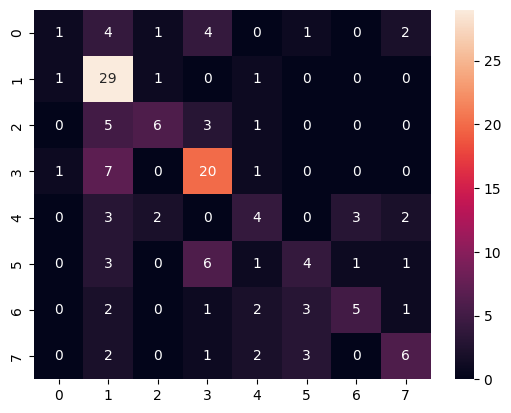

In [31]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, prediction_RF)
#print(cm)
sns.heatmap(cm, annot=True)

1/1 [==============================] - 0s 132ms/step
The prediction for this image is:  ['Euglena']
The actual label for this image is:  Euglena


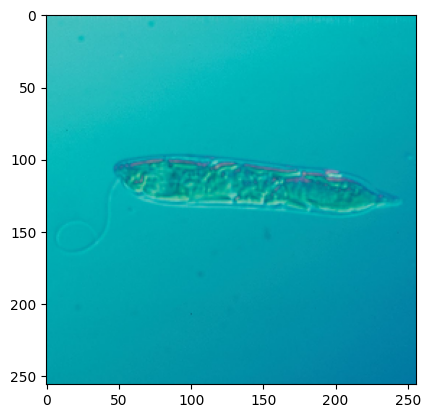

In [33]:
#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_RF = RF_model.predict(input_img_features)[0] 
prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])


